Attribute Information:

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [117]:
# reading the data from the csv file.

df = pd.read_csv('energydata_complete.csv')
data.shape

(19735, 29)

In [118]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
#Performing the descriptive statistics

df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [35]:
features = df.drop(['Appliances'], axis=1)
target = df['Appliances']

In [36]:
features.head()
features.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [37]:
target.columns=['Appliances_energy']
target.head()
target.columns

['Appliances_energy']

In [38]:
features['date'] = pd.to_datetime(features['date'])

In [39]:
features['Year'] = features['date'].dt.year
features['Month'] = features['date'].dt.month
features['week'] = features['date'].dt.week
features['Day'] = features['date'].dt.day
features['Hour'] = features['date'].dt.hour
features['Minute'] = features['date'].dt.minute

<ipython-input-39-ffde5ac2b0e2>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  features['week'] = features['date'].dt.week


In [40]:
def function_to_change_date(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [41]:
features['day_time_in_words'] = features['Hour'].apply(function_to_change_date)

In [42]:
features.head()

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Tdewpoint,rv1,rv2,Year,Month,week,Day,Hour,Minute,day_time_in_words
0,2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,13.275433,13.275433,2016,1,2,11,17,0,Evening
1,2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,18.606195,18.606195,2016,1,2,11,17,10,Evening
2,2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,28.642668,28.642668,2016,1,2,11,17,20,Evening
3,2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,45.410389,45.410389,2016,1,2,11,17,30,Evening
4,2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,10.084097,10.084097,2016,1,2,11,17,40,Evening


In [43]:
features = features.drop(['date'], axis=1)

In [44]:
features.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,Year,Month,week,Day,Hour,Minute,day_time_in_words
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,2,11,17,0,Evening
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,2,11,17,10,Evening
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,2,11,17,20,Evening
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,2,11,17,30,Evening
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,2,11,17,40,Evening


In [45]:
from sklearn.preprocessing import LabelEncoder


In [46]:
LE = LabelEncoder()
features['day_time_in_words'] = LE.fit_transform(features['day_time_in_words'])

In [47]:
features.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,Year,Month,week,Day,Hour,Minute,day_time_in_words
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,2,11,17,0,1
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,2,11,17,10,1
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,2,11,17,20,1
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,2,11,17,30,1
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,2,11,17,40,1


In [ ]:
#Visualizing Data for checking Outliers, distributions and correlations between variables



In [48]:
features.isna().sum()

lights               0
T1                   0
RH_1                 0
T2                   0
RH_2                 0
T3                   0
RH_3                 0
T4                   0
RH_4                 0
T5                   0
RH_5                 0
T6                   0
RH_6                 0
T7                   0
RH_7                 0
T8                   0
RH_8                 0
T9                   0
RH_9                 0
T_out                0
Press_mm_hg          0
RH_out               0
Windspeed            0
Visibility           0
Tdewpoint            0
rv1                  0
rv2                  0
Year                 0
Month                0
week                 0
Day                  0
Hour                 0
Minute               0
day_time_in_words    0
dtype: int64

In [49]:
# To identify the duplicate records in Dataframe
duplicate_list=features[features.duplicated()]
duplicate_list # So duplicate records found in the dataframe

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,Year,Month,week,Day,Hour,Minute,day_time_in_words


<Figure size 432x288 with 0 Axes>

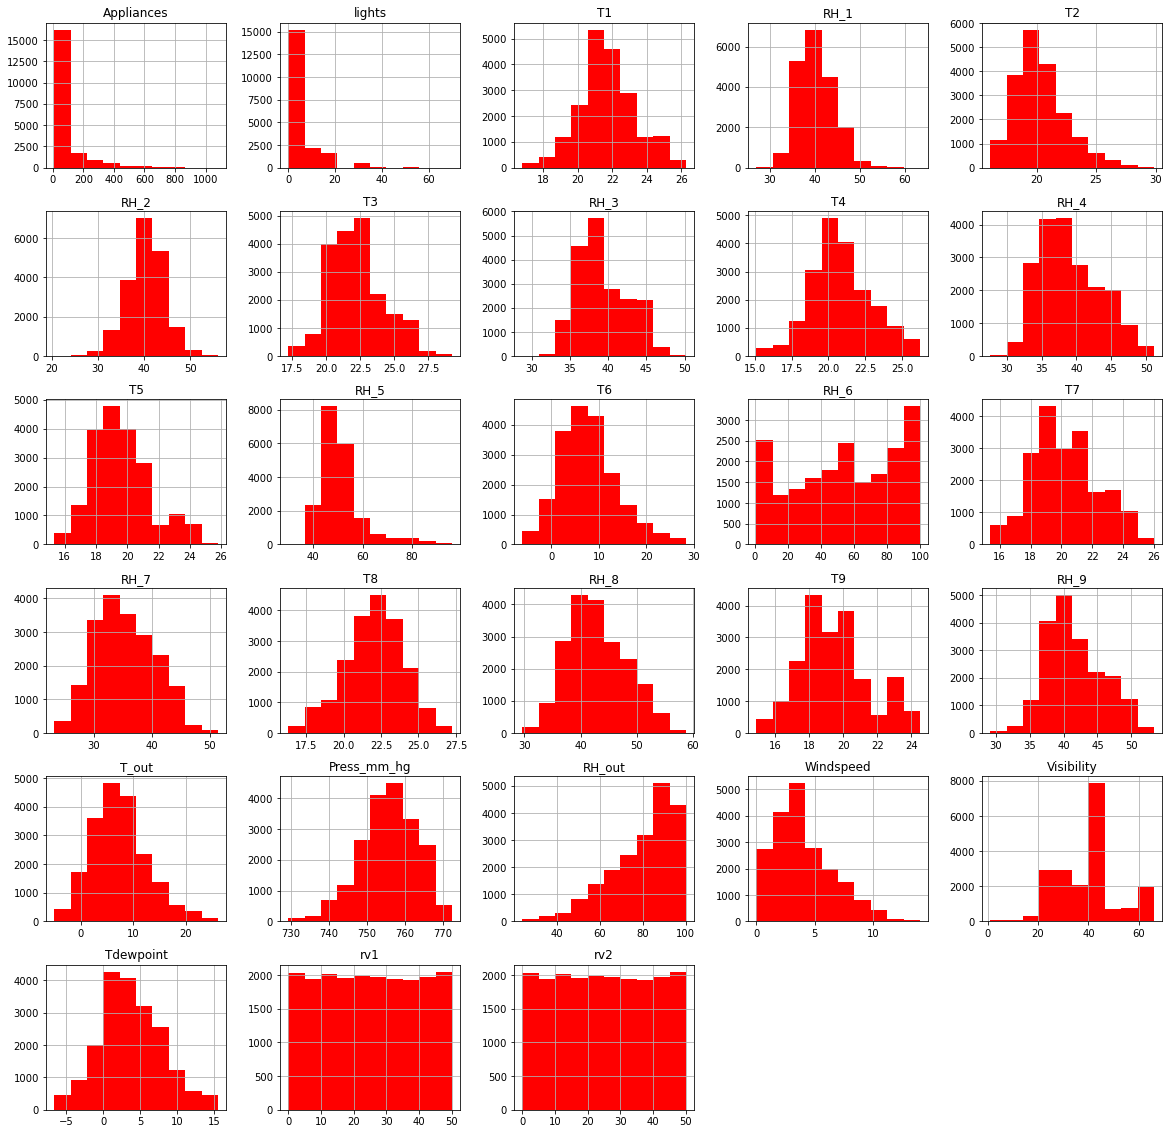

In [53]:
#checking the distribution of data using histogram
plt.figure()
df.hist(figsize=(20,20),color='Red')
plt.show()

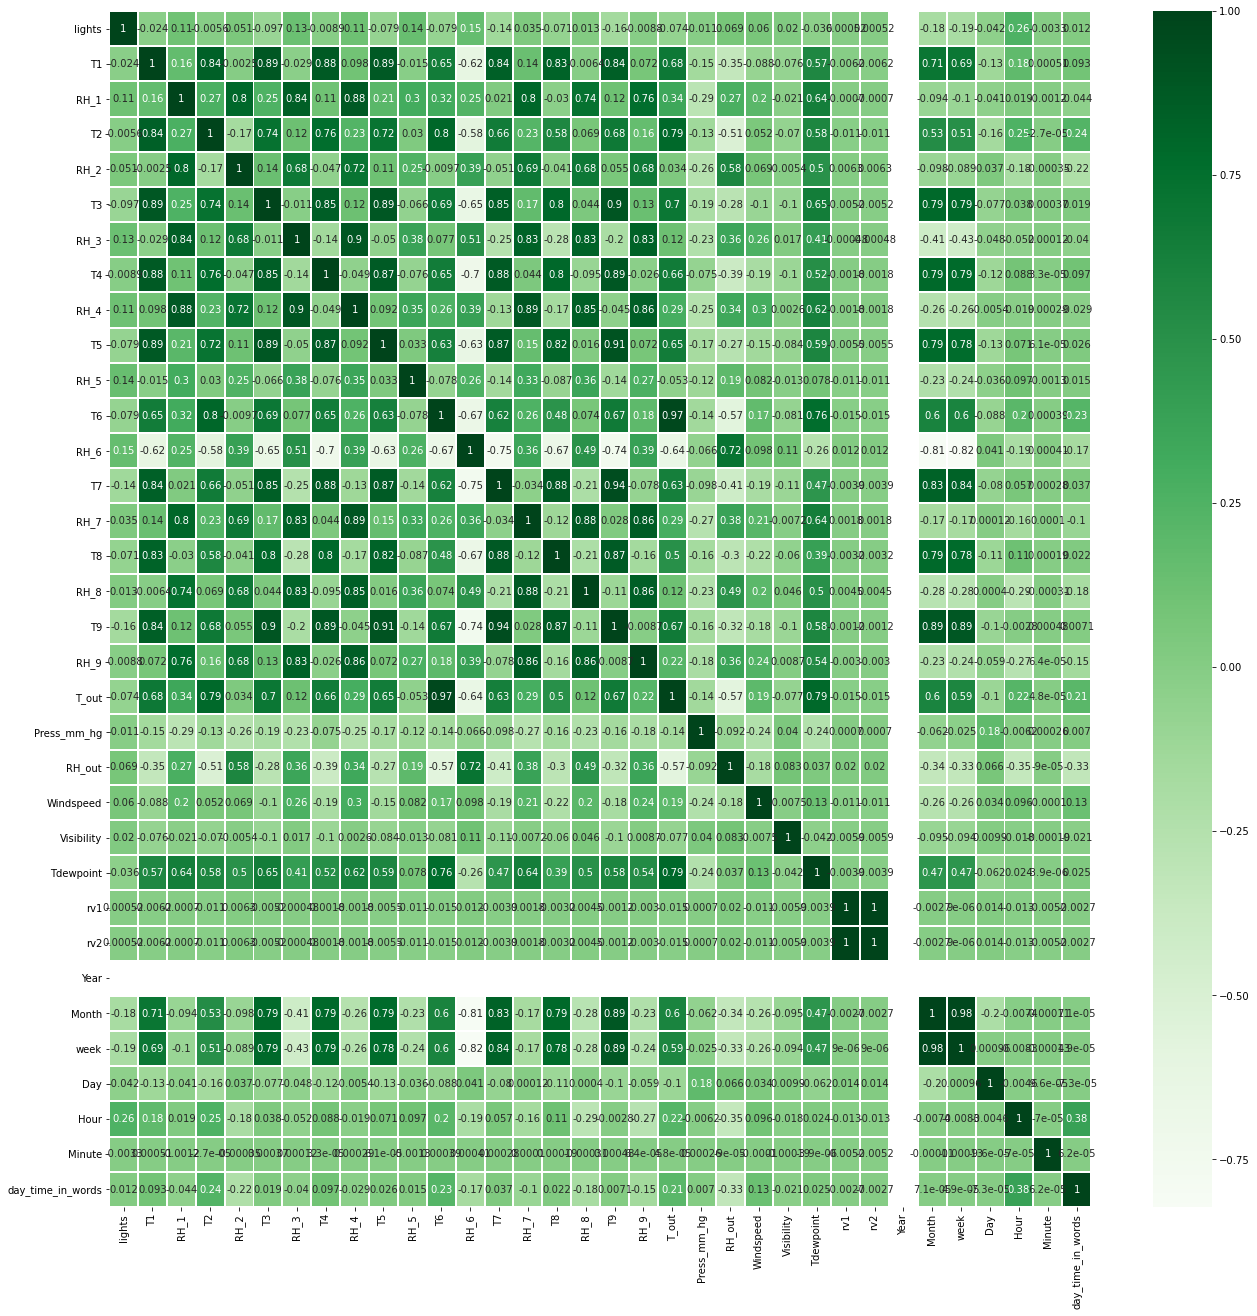

In [54]:
#Correlation matrix

plt.figure(figsize = (22,22))
cor = features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, linewidths=1, linecolor='White')
plt.show()

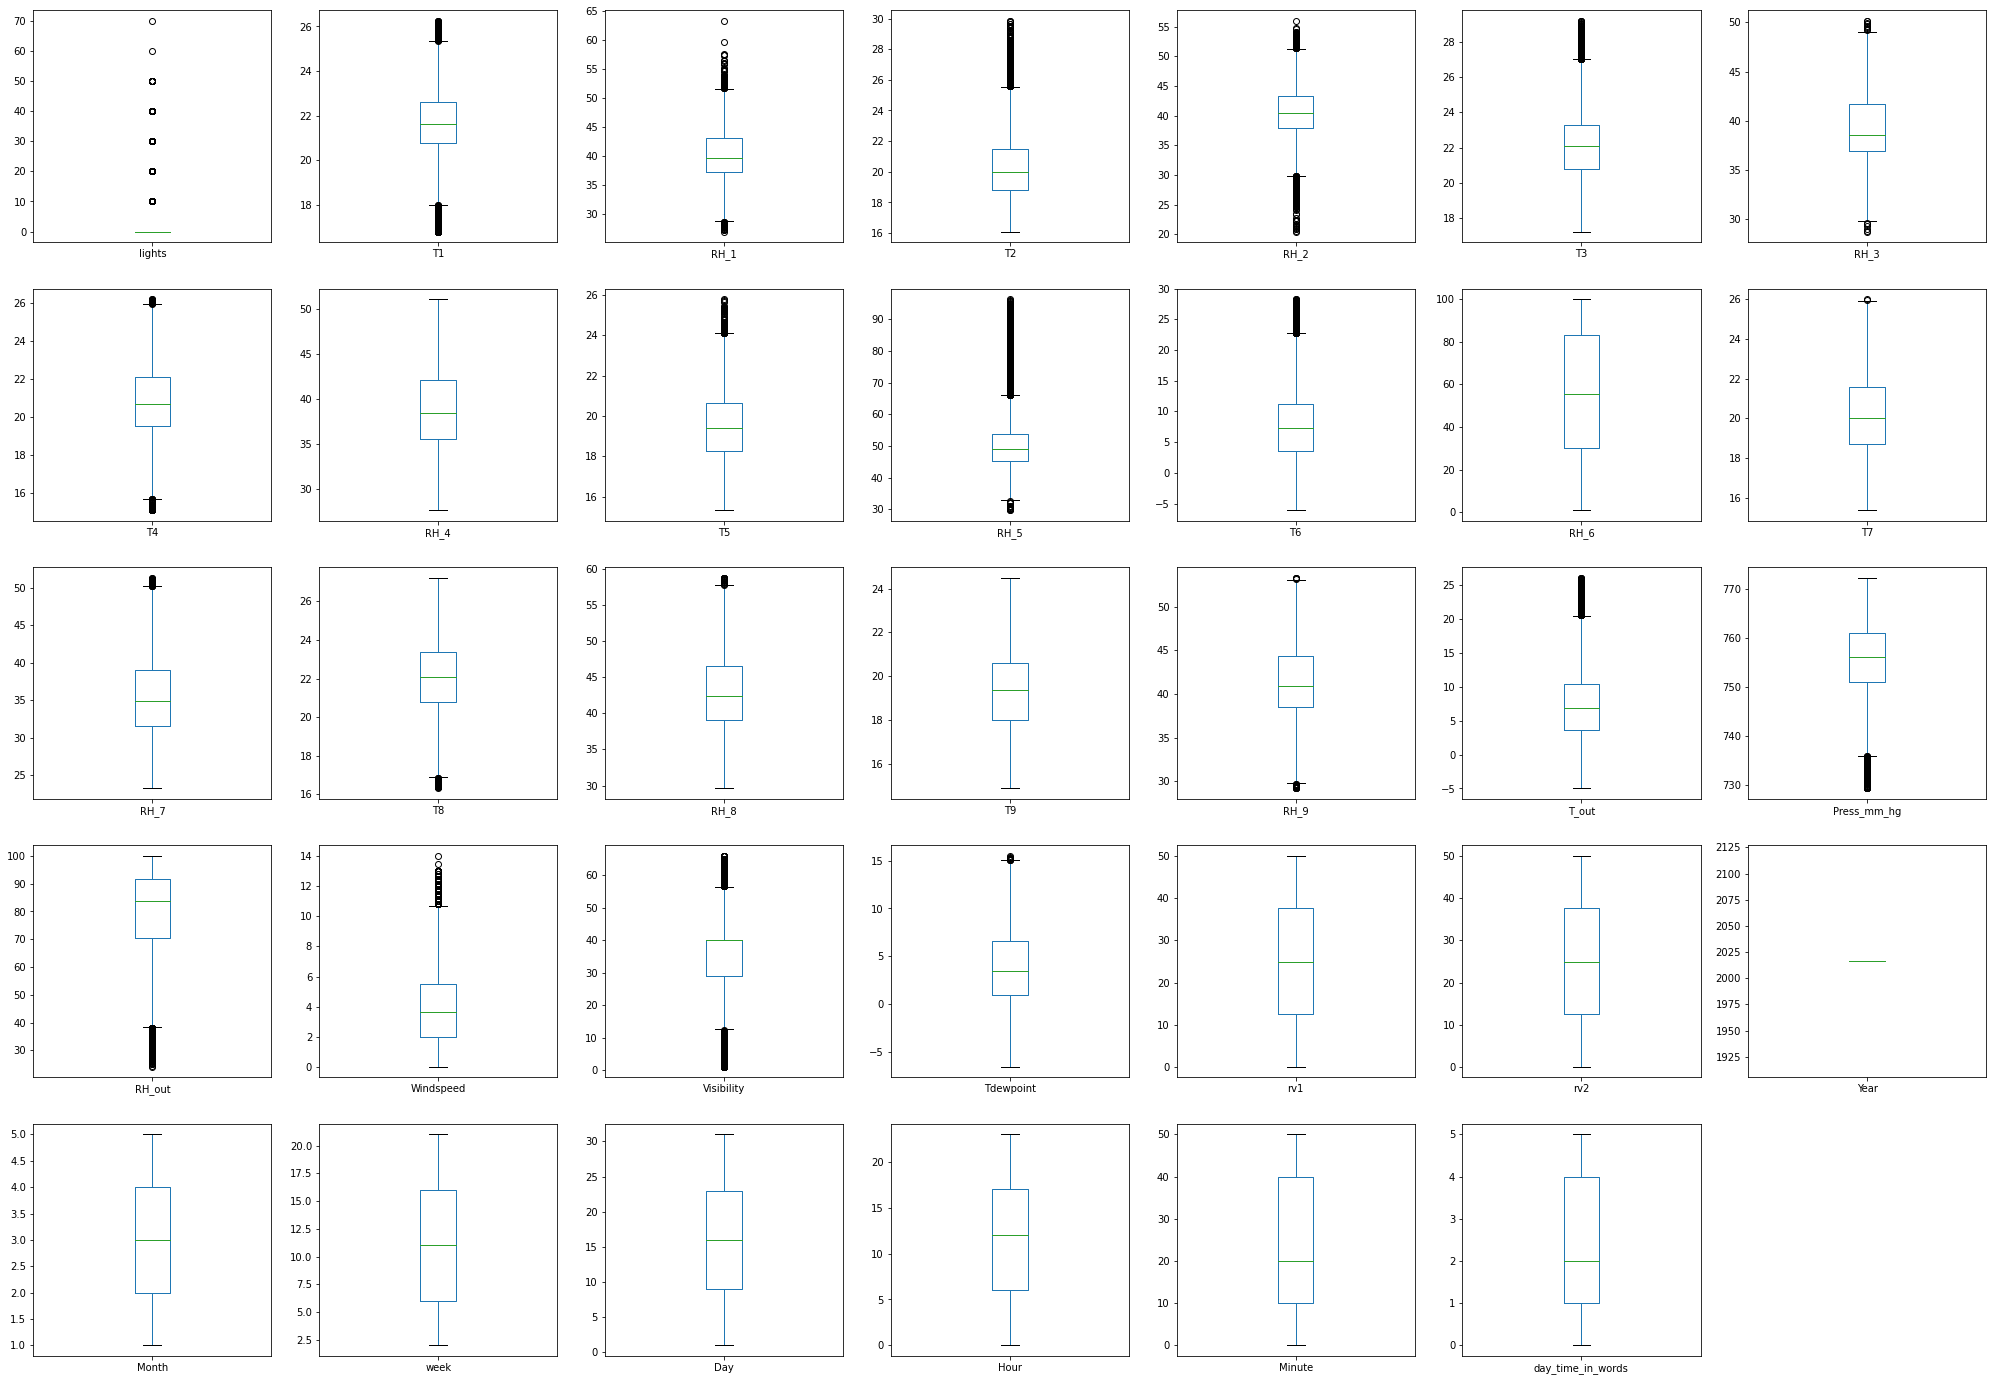

In [52]:
# BoxPlot to check the outlier 

features.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False, figsize=(35,35))
plt.show()

In [58]:
#Correlation between Features and Target Variable

df[df.columns[1:]].corr()['Appliances'][:]

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

Text(0, 0.5, 'Number of houses')

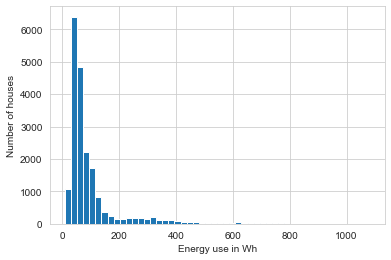

In [61]:
plt.hist(df['Appliances'],bins=50)
plt.xlabel('Energy use in Wh')
plt.ylabel('Number of houses')


In [69]:
#Making data scaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import preprocessing
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
import pandas as pd
from pandas import Series,DataFrame



In [63]:
scaler = preprocessing.RobustScaler()
robust_scaled_features = scaler.fit_transform(features)


In [64]:
features = pd.DataFrame(robust_scaled_features, columns=features.columns)

In [65]:
features.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,Year,Month,week,Day,Hour,Minute,day_time_in_words
0,30.0,-0.929348,1.384884,-0.295203,0.800373,-0.924,1.275720,-0.648508,1.081489,-0.949273,...,0.329412,-0.463297,-0.463297,0.0,-1.0,-0.9,-0.357143,0.454545,-0.666667,-0.333333
1,30.0,-0.929348,1.227326,-0.295203,0.787780,-0.924,1.288066,-0.648508,1.145749,-0.949273,...,0.311765,-0.250797,-0.250797,0.0,-1.0,-0.9,-0.357143,0.454545,-0.333333,-0.333333
2,30.0,-0.929348,1.158721,-0.295203,0.769900,-0.924,1.317558,-0.677043,1.130282,-0.949273,...,0.294118,0.149288,0.149288,0.0,-1.0,-0.9,-0.357143,0.454545,0.000000,-0.333333
3,40.0,-0.929348,1.118023,-0.295203,0.763060,-0.924,1.331276,-0.691310,1.105131,-0.949273,...,0.276471,0.817700,0.817700,0.0,-1.0,-0.9,-0.357143,0.454545,0.333333,-0.333333
4,40.0,-0.929348,1.164535,-0.295203,0.751866,-0.924,1.331276,-0.691310,1.075956,-0.935041,...,0.258824,-0.590514,-0.590514,0.0,-1.0,-0.9,-0.357143,0.454545,0.666667,-0.333333


In [71]:
lreg=LinearRegression()

In [73]:
X_multi=df.drop('Appliances',1)
X_multi=df.drop('date',1)
Y_target=df.Appliances

In [74]:
lreg.fit(X_multi,Y_target)

LinearRegression()

In [76]:
print("Estimated intercept coefficient is ",lreg.intercept_)

Estimated intercept coefficient is  -2.0747847884194925e-12


In [75]:
print("The number of coefficient used was",len(lreg.coef_))

The number of coefficient used was 28


In [77]:
coeff_df= DataFrame(df.columns)
coeff_df.columns=['Features']
coeff_df

coeff_df['Coefficient Estimate']=Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,date,1.000000e+00
1,Appliances,-1.891170e-14
2,lights,-8.353780e-15
3,T1,-5.500423e-15
4,RH_1,7.623412e-15
5,T2,6.433429e-15
6,RH_2,4.639195e-15
7,T3,-2.904422e-15
8,RH_3,-1.361130e-15
9,T4,-2.147367e-15


In [78]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(df['RH_1'],df['Appliances'])

In [79]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(14801,) (4934,) (14801,) (4934,)


In [81]:
lreg=LinearRegression()

In [82]:
X_train=np.vstack(X_train)
Y_train=np.vstack(Y_train)
X_test=np.vstack(X_test)
Y_test=np.vstack(Y_test)

In [83]:
lreg.fit(X_train,Y_train)

LinearRegression()

In [84]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(14801, 1) (4934, 1) (14801, 1) (4934, 1)


In [86]:
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [88]:
print(mean_absolute_error(Y_train,pred_train))
print(mean_absolute_error(Y_test,pred_test))

59.94013581812834
60.788849329268814


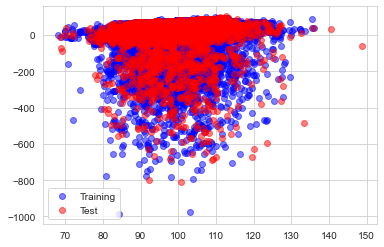

In [89]:
train=plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test=plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)



plt.legend((train,test),('Training','Test'),loc='lower left')

In [114]:
#Linear Regression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

rmse = (np.sqrt(mean_squared_error(Y_test, pred_test)))
r2 = r2_score(Y_test, pred_test)
mse = mean_squared_error(Y_test, pred_test)

print("The model efficiency for testing set")
print("======================================")
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test, pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(Y_train)-1)/(len(Y_train)-df.shape[1]-1)))

The model efficiency for testing set
Mean Absolute Error :  62.024627326718445
MSE score is 12446.743634079132
RMSE is 111.56497494321026
R2 score is -0.15524390680071587
Adjusted R2 score is -0.15751200464766058


In [96]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred_test = dtr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, pred_test)))
r2 = r2_score(Y_test, pred_test)
mse = mean_squared_error(Y_test, pred_test)

print("The model efficiency for testing set")
print("======================================")
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test, pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(Y_train)-1)/(len(Y_train)-df.shape[1]-1)))

The model efficiency for testing set
Mean Absolute Error :  62.024627326718445
MSE score is 12446.743634079132
RMSE is 111.56497494321026
R2 score is -0.15524390680071587
Adjusted R2 score is -0.15751200464766058


In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
#GradientBoostingRegressor


gd = GradientBoostingRegressor()
gd.fit(X_train,Y_train)
pred_test = gd.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, pred_test)))
r2 = r2_score(Y_test, pred_test)
mse = mean_squared_error(Y_test, pred_test)

print("The model efficiency for testing set")
print("======================================")
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(Y_train)-1)/(len(Y_train)-df.shape[1]-1)))

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The model efficiency for testing set
Mean Absolute Error :  59.93214982178872
MSE score is 10507.522781630802
RMSE is 102.50620850285509
R2 score is 0.02474478257808388
Adjusted R2 score is 0.022830057691127226


In [103]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf = RandomForestRegressor()
rf_model = rf.fit(X_train,Y_train)
pred_test = rf_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, pred_test)))
r2 = r2_score(Y_test, pred_test)
mse = mean_squared_error(Y_test, pred_test)

print("The model efficiency for testing set")
print("======================================")
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(Y_train)-1)/(len(Y_train)-df.shape[1]-1)))

<ipython-input-111-c42fa7b23b7c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf.fit(X_train,Y_train)


The model efficiency for testing set
Mean Absolute Error :  60.5580055931673
MSE score is 11505.658723993247
RMSE is 107.26443363945594
R2 score is -0.06789715650836503
Adjusted R2 score is -0.06999376591454909


In [107]:
from sklearn.svm import SVR

In [116]:
svr =  SVR()
svr.fit(X_train,Y_train)
pred_test = svr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, pred_test)))
r2 = r2_score(Y_test, pred_test)
mse = mean_squared_error(Y_test, pred_test)

print("The model efficiency for test dataset")
print("======================================")
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(Y_train)-1)/(len(Y_train)-df.shape[1]-1)))

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The model efficiency for test dataset
Mean Absolute Error :  50.02809947749769
MSE score is 12031.209622403767
RMSE is 109.68687078408139
R2 score is -0.11667613765810536
Adjusted R2 score is -0.1188685151540152
